In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

currentpath = os.getcwd()
print("Current path:", currentpath)

Current path: C:\Users\user\Desktop\Projects Sree Richi


In [2]:
# here we DO normalize the data to the number of counts per column (CPM)

In [3]:
# and compute LOG2 enrichment ratio : log2 ((CPM_IP + 1) / (CPM_NP + 1))  
# or CPM_IP / CPM_NP
# or CPM_IP - CPM_NP

In [4]:
print("Data normalization strategies: \n")

print("CPM_IP / CPM_NP \n")
print("CPM_IP - CPM_NP \n")
print("log2 ((CPM_IP + 1) / (CPM_NP + 1) \n")

Data normalization strategies: 

CPM_IP / CPM_NP 

CPM_IP - CPM_NP 

log2 ((CPM_IP + 1) / (CPM_NP + 1) 



In [5]:
file_path = 'A549_featureCounts_table.txt'

# Read the file using tab as the separator
df = pd.read_csv(file_path, sep='\t')

# Take a quick look at the DataFrame
print(df.head(3))

              Geneid                                                Chr  \
0  ENSG00000290825.2  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   
1  ENSG00000223972.6                      chr1;chr1;chr1;chr1;chr1;chr1   
2  ENSG00000310526.1  chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...   

                                               Start  \
0  11121;11125;11410;11411;11426;11770;11819;1182...   
1                12010;12179;12613;12975;13221;13453   
2  14356;14356;14356;14356;14356;14356;14356;1436...   

                                                 End  \
0  11211;11211;11671;11671;11671;11844;11844;1184...   
1                12057;12227;12697;13052;13374;13670   
2  14829;14829;14829;14829;14829;14829;14829;1482...   

                                              Strand  Length  AC1_IP  AC1_NP  \
0  +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...  2898.0     0.0     1.0   
1                                        +;+;+;+;+;+   632.0     0.0     0.0   
2  -;-;-;

In [6]:
rows, columns = df.shape
print("Number of genes :", rows)
print("Number of samples:", columns - 6 )

Number of genes : 78728
Number of samples: 12


In [7]:
print(df.columns)

Index(['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'AC1_IP', 'AC1_NP',
       'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP', 'AP2_IP', 'AP2_NP', 'AV1_IP',
       'AV1_NP', 'AV2_IP', 'AV2_NP'],
      dtype='object')


In [8]:
i = df 
# i['Chrom'] = i['Chr'].apply(lambda s: list(set(filter(None, s.split(';'))))[0])
# i.head(3)
i['Chrom'] = i['Chr'].apply(lambda s: set(filter(None, s.split(';'))).pop())
i.head(3)

,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP,Chrom
0,ENSG00000290825.2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,11121;11125;11410;11411;11426;11770;11819;1182...,11211;11211;11671;11671;11671;11844;11844;1184...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,2898.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr1
1,ENSG00000223972.6,chr1;chr1;chr1;chr1;chr1;chr1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,chr1
2,ENSG00000310526.1,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14356;14356;14356;14356;14356;14356;14356;1436...,14829;14829;14829;14829;14829;14829;14829;1482...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,6775.0,24.0,75.0,32.0,125.0,30.0,55.0,44.0,42.0,12.0,28.0,9.0,34.0,chr1


In [9]:
# Check the unique chromosome values in the new 'Chrom' column
print("Unique Chrom values:", i['Chrom'].unique())
print("Number of rows:", i.shape[0])
print("Number of columns:", i.shape[1])

Unique Chrom values: ['chr1' 'chr2' '178578715' '-' 'chr3' 'chr4' '113196466' '+' 'chr5' 'chr6'
 'chr7' 'chr8' 'chr9' 'chr10' 'chr11' 'chr12' 'chr13' 'chr14' 'chr15'
 'chr16' 'chr17' 'chr18' 'chr19' 'chr20' 'chr21' 'chr22' 'chrX' 'chrY'
 'chrM']
Number of rows: 78728
Number of columns: 19


          AC1_IP    AC1_NP    AC2_IP    AC2_NP    AP1_IP    AP1_NP    AP2_IP  \
AC1_IP  1.000000  0.823296  0.999454  0.916261  0.997511  0.876169  0.998563   
AC1_NP  0.823296  1.000000  0.824643  0.970678  0.816281  0.964606  0.806502   
AC2_IP  0.999454  0.824643  1.000000  0.917766  0.997196  0.877683  0.998570   
AC2_NP  0.916261  0.970678  0.917766  1.000000  0.905899  0.957277  0.908301   
AP1_IP  0.997511  0.816281  0.997196  0.905899  1.000000  0.875831  0.996142   
AP1_NP  0.876169  0.964606  0.877683  0.957277  0.875831  1.000000  0.863103   
AP2_IP  0.998563  0.806502  0.998570  0.908301  0.996142  0.863103  1.000000   
AP2_NP  0.861546  0.993729  0.863457  0.986685  0.852679  0.971725  0.848785   
AV1_IP  0.926983  0.948615  0.928500  0.968329  0.926433  0.935266  0.914265   
AV1_NP  0.994894  0.861041  0.995483  0.945780  0.989638  0.896455  0.992631   
AV2_IP  0.987944  0.883848  0.989021  0.956247  0.984829  0.911405  0.984287   
AV2_NP  0.946558  0.925362  0.948821  0.

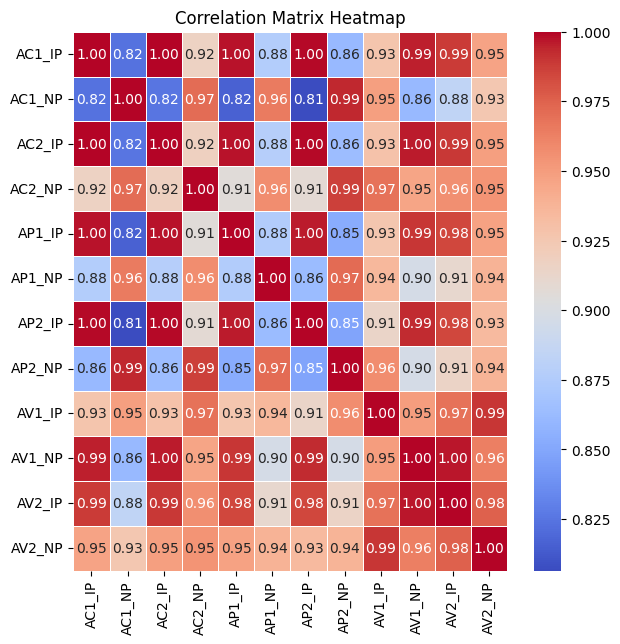

In [10]:
correlation_matrix = i[['AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP',
                         'AP2_IP', 'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP']].corr()
print(correlation_matrix)

# Display correlation matrix as heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [11]:
# Compute the number of NA and NaN :

total_nans = i.isna().sum().sum()
print("Total NaN values:", total_nans)

nans_per_column = i.isna().sum()
# print("NaNs per column:\n", nans_per_column)

i_clean = i.dropna()

print("Shape after removing NaNs:", i_clean.shape)
i = i_clean

Total NaN values: 68
Shape after removing NaNs: (78722, 19)


In [12]:
# I preferred to normaliz after excluding these chromosomes : chrY, chrM

In [13]:
fi = i[~i["Chrom"].isin(["chrY", "chrM"])]

In [14]:
print("Unique Chrom values:", fi['Chrom'].unique())
print("Number of rows:", fi.shape[0])
print("Number of columns:", fi.shape[1])

print("Name of columns: \n")
print(fi.columns.tolist())

Unique Chrom values: ['chr1' 'chr2' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8' 'chr9' 'chr10'
 'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17' 'chr18' 'chr19'
 'chr20' 'chr21' 'chr22' 'chrX']
Number of rows: 78005
Number of columns: 19
Name of columns: 

['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP', 'AP2_IP', 'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP', 'Chrom']


In [15]:
fi2 = fi.drop(columns=['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'Chrom'])

In [16]:
# Get summary statistics (mean, min, max) for numeric columns
summary_stats = fi2.describe().loc[['mean', 'min', 'max']]
print(summary_stats.round(2))

print("Name of columns: \n")
print(fi2.columns.tolist())

print("Filtered DataFrame shape:", fi2.shape)

          AC1_IP      AC1_NP      AC2_IP      AC2_NP      AP1_IP     AP1_NP  \
mean      449.85      370.98      545.27      364.24      396.61     200.54   
min         0.00        0.00        0.00        0.00        0.00       0.00   
max   4204654.00  1260415.00  4606575.00  1800214.00  3146892.00  481798.00   

          AP2_IP     AP2_NP    AV1_IP      AV1_NP      AV2_IP      AV2_NP  
mean      556.24     153.21     179.4      508.14      192.33      525.73  
min         0.00       0.00       0.0        0.00        0.00        0.00  
max   5996660.00  571656.00  783834.0  4399206.00  1449076.00  1921028.00  
Name of columns: 

['AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP', 'AP2_IP', 'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP']
Filtered DataFrame shape: (78005, 12)


In [17]:
print("Filtering zero values")

Filtering zero values


In [18]:
print("Filter rows: keep only rows with no zeros in the numerical columns IP and NP")

Filter rows: keep only rows with no zeros in the numerical columns IP and NP


In [19]:
# Extract column names
cols = fi2.columns.tolist()
print("Column names:", cols)

# Filter rows: keep only rows with no zeros in these columns
fi2_filtered = fi2[(fi2[cols] != 0).all(axis=1)]

# Verify the results
print("Filtered DataFrame shape:", fi2_filtered.shape)

Column names: ['AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP', 'AP2_IP', 'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP']
Filtered DataFrame shape: (24721, 12)


In [20]:
fi2 = fi2_filtered

In [21]:
column_sums = fi2.sum()
print("Sum of counts per column:")
print(column_sums)

cols = fi.select_dtypes(include=['number']).columns
print(cols)

Sum of counts per column:
AC1_IP    34103364.0
AC1_NP    28403535.0
AC2_IP    41295336.0
AC2_NP    27928653.0
AP1_IP    29954021.0
AP1_NP    15307983.0
AP2_IP    42134665.0
AP2_NP    11724081.0
AV1_IP    13568381.0
AV1_NP    38595038.0
AV2_IP    14578601.0
AV2_NP    39863708.0
dtype: float64
Index(['Length', 'AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP',
       'AP2_IP', 'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP'],
      dtype='object')


In [22]:
print("CPM normalization per TOTAL COUNTS per each sample")

CPM normalization per TOTAL COUNTS per each sample


In [23]:
# CPM normalization per TOTAL COUNTS per each COLUMN

cols = fi2.columns.tolist()

# Normalize selected columns by dividing by their own column sums (total counts normalization)
fi2n = fi2[cols].div(fi2[cols].sum(), axis=1) * 1e6  # Multiply by 1 million (CPM normalization)

# Display the normalized DataFrame
print(fi2n.head())

column_sums_after_norm = fi2n.sum()
print("Column sums after normalization:")
print(column_sums_after_norm)

print(cols)

      AC1_IP    AC1_NP    AC2_IP    AC2_NP    AP1_IP    AP1_NP    AP2_IP  \
2   0.703743  2.640516  0.774906  4.475690  1.001535  3.592897  1.044271   
25  3.225488  3.415068  3.705019  4.404079  5.675365  2.613016  3.939749   
31  0.263904  0.246448  0.193726  0.286444  0.634305  0.195976  0.142401   
34  0.234581  0.387276  0.508532  0.143222  0.467383  0.195976  0.189867   
37  0.322549  3.062999  0.242158  3.079275  0.467383  4.572777  0.142401   

      AP2_NP    AV1_IP    AV1_NP    AV2_IP    AV2_NP  
2   3.582370  0.884409  0.725482  0.617343  0.852906  
25  3.070603  2.505826  2.901927  3.223903  2.082094  
31  0.255884  1.547716  0.414561  0.617343  0.677308  
34  0.426473  0.884409  0.259101  0.411562  0.953248  
37  3.241192  0.294803  0.181370  0.205781  0.200684  
Column sums after normalization:
AC1_IP    1000000.0
AC1_NP    1000000.0
AC2_IP    1000000.0
AC2_NP    1000000.0
AP1_IP    1000000.0
AP1_NP    1000000.0
AP2_IP    1000000.0
AP2_NP    1000000.0
AV1_IP    1000000.0


In [24]:
print("CPM normalized matrix : fi2n")

CPM normalized matrix : fi2n


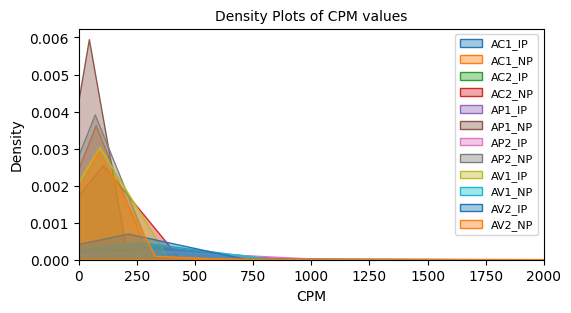

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(6, 3))

# Plot density curves for each sample
for col in cols:
    sns.kdeplot(fi2n[col], label=col, fill=True, alpha=0.4)

# Customize plot with smaller font sizes
plt.xlabel("CPM", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.title("Density Plots of CPM values", fontsize=10)  
plt.legend(fontsize=8)
plt.xlim(0, 2000)
plt.grid(False)

# Display the plot
plt.show()

In [26]:
print("CPM normalized matrix : fi2n")

CPM normalized matrix : fi2n


In [27]:
# Calculate summary statistics
summary_stats = fi2n.agg(['max', 'min', 'median']).T

# Display summary clearly
print("Summary statistics for each column:\n")
print(summary_stats.round(4))


Summary statistics for each column:

                max     min  median
AC1_IP  123291.4735  0.0293  2.5804
AC1_NP   44375.2864  0.0352  3.5911
AC2_IP  111551.9438  0.0242  2.8090
AC2_NP   64457.6020  0.0358  3.3657
AP1_IP  105057.4145  0.0334  3.2049
AP1_NP   31473.6435  0.0653  3.3969
AP2_IP  142321.2929  0.0237  2.3021
AP2_NP   48759.1309  0.0853  2.9000
AV1_IP   57769.1620  0.0737  3.3165
AV1_NP  113983.7199  0.0259  2.6169
AV2_IP   99397.4662  0.0686  2.6066
AV2_NP   48189.8974  0.0251  2.8347


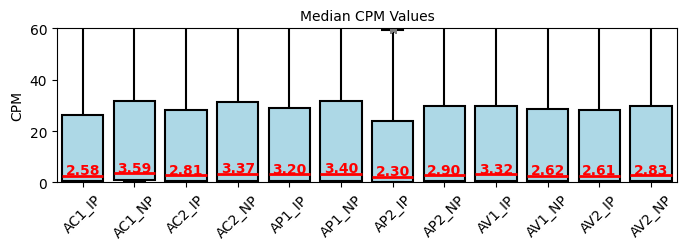

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 2))

# Create detailed boxplots with customized appearance
ax = sns.boxplot(
    data=fi2n,
    showmeans=False,
    medianprops={"color": "red", "linewidth": 2},
    boxprops={"facecolor": "lightblue", "edgecolor": "black", "linewidth": 1.5},
    whiskerprops={"color": "black", "linewidth": 1.5},
    capprops={"color": "black", "linewidth": 1.5},
    flierprops={"marker": "x", "markerfacecolor": "gray", "markeredgecolor": "gray", "markersize": 5}
)

# Annotate medians clearly
medians = fi2n.median()
for tick, median in enumerate(medians):
    ax.text(tick, median + 0.5, f'{median:.2f}', 
            horizontalalignment='center', 
            color='red', 
            weight='bold')

# Customize plot appearance
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("CPM", fontsize=10)
plt.title("Median CPM Values", fontsize=10)
plt.ylim(0, 60)  # Adjust y-limit as needed

# Display plot
plt.show()

In [29]:
rows, columns = fi2n.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print(fi2n.columns)
print(fi2n.head(3))

Number of rows: 24721
Number of columns: 12
Index(['AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP', 'AP2_IP',
       'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP'],
      dtype='object')
      AC1_IP    AC1_NP    AC2_IP    AC2_NP    AP1_IP    AP1_NP    AP2_IP  \
2   0.703743  2.640516  0.774906  4.475690  1.001535  3.592897  1.044271   
25  3.225488  3.415068  3.705019  4.404079  5.675365  2.613016  3.939749   
31  0.263904  0.246448  0.193726  0.286444  0.634305  0.195976  0.142401   

      AP2_NP    AV1_IP    AV1_NP    AV2_IP    AV2_NP  
2   3.582370  0.884409  0.725482  0.617343  0.852906  
25  3.070603  2.505826  2.901927  3.223903  2.082094  
31  0.255884  1.547716  0.414561  0.617343  0.677308  


In [30]:
print("DIFFERENCE : CPM_IP - CPM_NP")

DIFFERENCE : CPM_IP - CPM_NP


In [31]:
fi2n["AC1_Diff"] = fi2n["AC1_IP"] - fi2n["AC1_NP"]
fi2n["AC2_Diff"] = fi2n["AC2_IP"] - fi2n["AC2_NP"]
fi2n["AP1_Diff"] = fi2n["AP1_IP"] - fi2n["AP1_NP"]
fi2n["AP2_Diff"] = fi2n["AP2_IP"] - fi2n["AP2_NP"]
fi2n["AV1_Diff"] = fi2n["AV1_IP"] - fi2n["AV1_NP"]
fi2n["AV2_Diff"] = fi2n["AV2_IP"] - fi2n["AV2_NP"]

In [32]:
print(fi2n.columns)

Index(['AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP', 'AP2_IP',
       'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP', 'AC1_Diff',
       'AC2_Diff', 'AP1_Diff', 'AP2_Diff', 'AV1_Diff', 'AV2_Diff'],
      dtype='object')


In [33]:
# Define the columns to extract
selected_columns = ['AC1_Diff', 'AC2_Diff', 'AP1_Diff', 'AP2_Diff', 'AV1_Diff', 'AV2_Diff']

# Extract the selected columns
fi2nsel = fi2n[selected_columns]

# Display the extracted DataFrame.head()
fi2nsel.head(3)

,AC1_Diff,AC2_Diff,AP1_Diff,AP2_Diff,AV1_Diff,AV2_Diff
2,-1.936774,-3.700784,-2.591362,-2.538100,0.158927,-0.235563
25,-0.189580,-0.699060,3.062349,0.869146,-0.396102,1.141809
31,0.017455,-0.092718,0.438329,-0.113483,1.133155,-0.059965


Summary Statistics:
           AC1_Diff      AC2_Diff      AP1_Diff      AP2_Diff      AV1_Diff  \
count  2.472100e+04  2.472100e+04  2.472100e+04  2.472100e+04  2.472100e+04   
mean   1.471615e-16  4.414844e-16 -1.103711e-16 -9.565496e-16 -5.334603e-16   
std    5.818400e+02  3.358744e+02  4.913761e+02  6.369724e+02  3.620687e+02   
min   -5.840670e+03 -1.381189e+04 -4.112082e+03 -7.328619e+03 -5.621456e+04   
25%   -5.607332e+00 -3.716052e+00 -4.199774e+00 -5.246788e+00 -2.901653e-01   
50%   -4.871108e-01 -2.580828e-01 -2.459666e-01 -3.931001e-01  2.827147e-01   
75%    8.491184e-01  1.252814e+00  1.436977e+00  7.844993e-01  2.279569e+00   
max    8.895360e+04  4.709434e+04  7.358377e+04  9.735888e+04  2.988648e+03   

           AV2_Diff  
count  2.472100e+04  
mean  -5.518555e-16  
std    3.499418e+02  
min   -1.411549e+03  
25%   -1.709306e+00  
50%   -1.085701e-01  
75%    4.601676e-01  
max    5.120757e+04  

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>

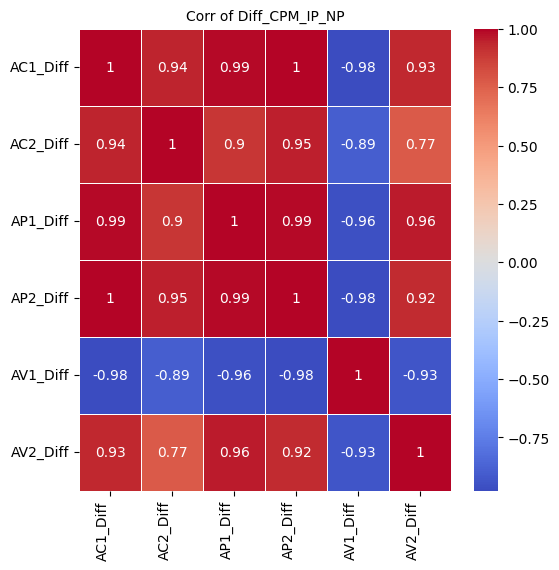

In [34]:
# Summary Statistics
print("Summary Statistics:")
print(fi2nsel.describe())

# Data Types and Non-Null Counts
print("\nData Types and Non-Null Counts:")
print(fi2nsel.info())

# Correlation Matrix
print("\nCorrelation Matrix:")
print(fi2nsel.corr())

# Display the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
sns.heatmap(fi2nsel.corr(), 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5)
plt.title('Corr of Diff_CPM_IP_NP', fontsize=10)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')  # Rotate and align
# Rotate y-axis labels
plt.yticks(rotation=0, ha='right')  # Rotation 0, keep horizontal

plt.show()

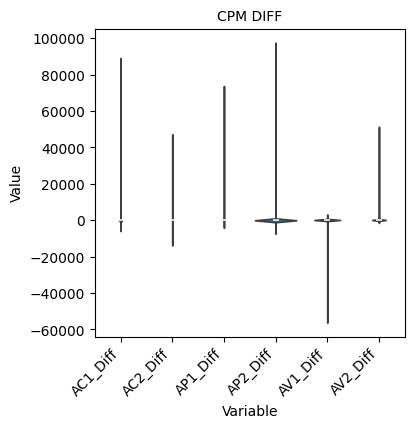

In [35]:
# Melt the DataFrame to long format for easier plotting
fi2nsel_melted = fi2nsel.melt(var_name='Variable', value_name='Value')

# Create the violin plot
plt.figure(figsize=(4, 4))  # Adjust figure size as needed
sns.violinplot(x='Variable', y='Value', data=fi2nsel_melted)
plt.title('CPM DIFF', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
print("RATIO : CPM_IP / CPM_NP")

RATIO : CPM_IP / CPM_NP


In [37]:
# instead of taking the difference, we perform the division : 

fi2n["AC1_Div"] = fi2n["AC1_IP"] / fi2n["AC1_NP"]
fi2n["AC2_Div"] = fi2n["AC2_IP"] / fi2n["AC2_NP"]
fi2n["AP1_Div"] = fi2n["AP1_IP"] / fi2n["AP1_NP"]
fi2n["AP2_Div"] = fi2n["AP2_IP"] / fi2n["AP2_NP"]
fi2n["AV1_Div"] = fi2n["AV1_IP"] / fi2n["AV1_NP"]
fi2n["AV2_Div"] = fi2n["AV2_IP"] / fi2n["AV2_NP"]


In [38]:
# Define the columns to extract
selected_columns = ['AC1_Div', 'AC2_Div', 'AP1_Div', 'AP2_Div', 'AV1_Div', 'AV2_Div']

# Extract the selected columns
fi2nseldiv = fi2n[selected_columns]

# Display the extracted DataFrame.head()

fi2nseldiv.head(3)

,AC1_Div,AC2_Div,AP1_Div,AP2_Div,AV1_Div,AV2_Div
2,0.266517,0.173137,0.278754,0.291503,1.219064,0.723811
25,0.944487,0.841270,2.171960,1.283054,0.863504,1.548394
31,1.070828,0.676315,3.236646,0.556505,3.733385,0.911466


Summary Statistics:
            AC1_Div       AC2_Div       AP1_Div       AP2_Div       AV1_Div  \
count  24721.000000  24721.000000  24721.000000  24721.000000  24721.000000   
mean       4.438913      4.147651      5.175592      5.140461      1.610353   
std       72.129226     51.779635     68.405682     81.289169      1.773264   
min        0.000108      0.000096      0.000133      0.000104      0.010123   
25%        0.271166      0.372911      0.397483      0.268871      0.831505   
50%        0.619311      0.763581      0.798354      0.612156      1.234693   
75%        1.521582      1.623156      1.758010      1.599953      1.808715   
max     7843.932717   3393.072092   4238.132270   7916.426213     71.112091   

            AV2_Div  
count  24721.000000  
mean       1.134743  
std        1.103465  
min        0.024198  
25%        0.607644  
50%        0.905809  
75%        1.346671  
max       27.343987  

 CPM DIV : Correlation Matrix:
          AC1_Div   AC2_Div   AP1_Div 

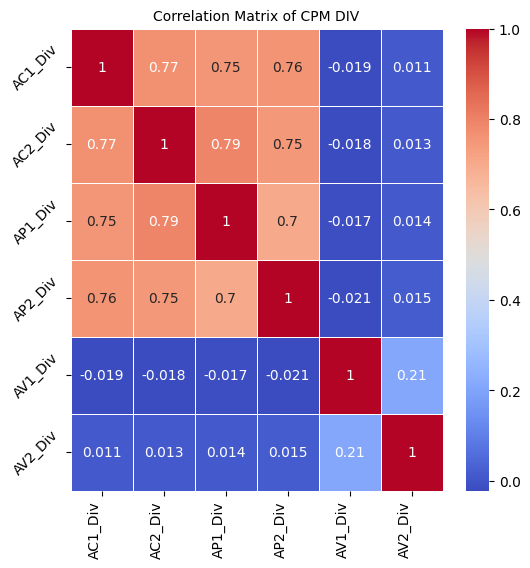

In [39]:
# Summary Statistics
print("Summary Statistics:")
print(fi2nseldiv.describe())

# Data Types and Non-Null Counts
# print("\nData Types and Non-Null Counts:")
# print(fi2nseldiv.info())

# Correlation Matrix
print("\n CPM DIV : Correlation Matrix:")
print(fi2nseldiv.corr())

# Display the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
sns.heatmap(fi2nseldiv.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of CPM DIV', fontsize=10)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')  # Rotate and align
# Rotate y-axis labels
plt.yticks(rotation=45, ha='right')  # Rotation 0, keep horizontal

plt.show()

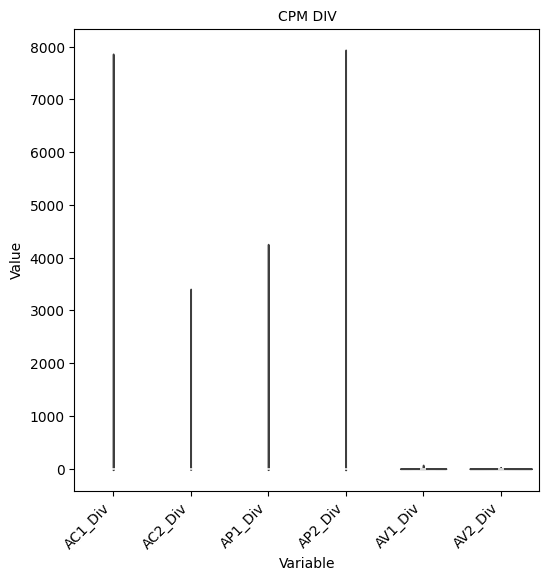

In [40]:
# Melt the DataFrame to long format for easier plotting
fi2nseldiv_melted = fi2nseldiv.melt(var_name='Variable', value_name='Value')

# Create the violin plot
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
sns.violinplot(x='Variable', y='Value', data=fi2nseldiv_melted)
plt.title('CPM DIV', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
# To apply the other method for normalization, that is log2 ((CPM_IP + 1) / (CPM_NP +1) )
# Shall we add 0.1 or 1 ? 
# The median of the normalized values is > 1, so we add 1, instead of 0.1

In [42]:
# Compute summary statistics
fi2n_summary = fi2n.describe().T  # Transpose to display in a readable format

# Add Median separately (since .describe() does not include median)
fi2n_summary["Median"] = fi2n.median()

# Display summary statistics
print(fi2n_summary)

            count          mean         std           min       25%       50%  \
AC1_IP    24721.0  4.045144e+01  849.869372      0.029323  0.410517  2.580391   
AC1_NP    24721.0  4.045144e+01  377.566890      0.035207  0.844965  3.591102   
AC2_IP    24721.0  4.045144e+01  769.849646      0.024216  0.508532  2.809034   
AC2_NP    24721.0  4.045144e+01  553.860824      0.035806  0.751916  3.365719   
AP1_IP    24721.0  4.045144e+01  721.885402      0.033384  0.600921  3.204912   
AP1_NP    24721.0  4.045144e+01  286.863488      0.065325  0.718579  3.396920   
AP2_IP    24721.0  4.045144e+01  968.834488      0.023733  0.332268  2.302142   
AP2_NP    24721.0  4.045144e+01  443.578613      0.085295  0.682356  2.900014   
AV1_IP    24721.0  4.045144e+01  506.875502      0.073701  0.737008  3.316534   
AV1_NP    24721.0  4.045144e+01  809.264374      0.025910  0.492291  2.616917   
AV2_IP    24721.0  4.045144e+01  728.436729      0.068594  0.480156  2.606560   
AV2_NP    24721.0  4.045144e

In [43]:
print("Log2 RATIO (CPM_IP + 1 ) / (CPM_NP + 1)")

Log2 RATIO (CPM_IP + 1 ) / (CPM_NP + 1)


In [44]:
# instead of taking the simple division or the simple difference, we use the formula log2(CPM + 1 for IP / CPM + 1 for NP) : 

fi2n["AC1_log"] = np.log2(fi2n["AC1_IP"] + 1) / (fi2n["AC1_NP"] + 1)
fi2n["AC2_log"] = np.log2(fi2n["AC2_IP"] + 1) / (fi2n["AC2_NP"] + 1)
fi2n["AP1_log"] = np.log2(fi2n["AP1_IP"] + 1) / (fi2n["AP1_NP"] + 1)
fi2n["AP2_log"] = np.log2(fi2n["AP2_IP"] + 1) / (fi2n["AP2_NP"] + 1)
fi2n["AV1_log"] = np.log2(fi2n["AV1_IP"] + 1) / (fi2n["AV1_NP"] + 1)
fi2n["AV2_log"] = np.log2(fi2n["AV2_IP"] + 1) / (fi2n["AV2_NP"] + 1)


In [45]:
print(fi2n.columns)

# Define the columns to extract
selected_columns = ['AC1_log', 'AC2_log', 'AP1_log', 'AP2_log', 'AV1_log', 'AV2_log']

# Extract the selected columns
fi2nlog = fi2n[selected_columns]

# Display the extracted DataFrame.head()
fi2nlog.head(3)

Index(['AC1_IP', 'AC1_NP', 'AC2_IP', 'AC2_NP', 'AP1_IP', 'AP1_NP', 'AP2_IP',
       'AP2_NP', 'AV1_IP', 'AV1_NP', 'AV2_IP', 'AV2_NP', 'AC1_Diff',
       'AC2_Diff', 'AP1_Diff', 'AP2_Diff', 'AV1_Diff', 'AV2_Diff', 'AC1_Div',
       'AC2_Div', 'AP1_Div', 'AP2_Div', 'AV1_Div', 'AV2_Div', 'AC1_log',
       'AC2_log', 'AP1_log', 'AP2_log', 'AV1_log', 'AV2_log'],
      dtype='object')


,AC1_log,AC2_log,AP1_log,AP2_log,AV1_log,AV2_log
2,0.211153,0.151167,0.217969,0.225121,0.529772,0.374345
25,0.470914,0.413429,0.758050,0.566117,0.463810,0.674404
31,0.271079,0.198588,0.592552,0.152935,0.953797,0.413535


Summary Statistics:
            AC1_log       AC2_log       AP1_log       AP2_log       AV1_log  \
count  24721.000000  24721.000000  24721.000000  24721.000000  24721.000000   
mean       0.329062      0.347447      0.379200      0.338402      0.361987   
std        0.485507      0.477378      0.525266      0.528040      0.263269   
min        0.000153      0.000137      0.000163      0.000132      0.000139   
25%        0.085664      0.101251      0.104822      0.082573      0.140217   
50%        0.183815      0.215380      0.230803      0.175819      0.308636   
75%        0.374567      0.410791      0.445470      0.375331      0.537849   
max        8.862574      7.545950      7.634765      8.884671      2.204325   

            AV2_log  
count  24721.000000  
mean       0.285612  
std        0.205612  
min        0.000344  
25%        0.119513  
50%        0.245349  
75%        0.409727  
max        2.134637  

Correlation Matrix:
          AC1_log   AC2_log   AP1_log   AP2_log  

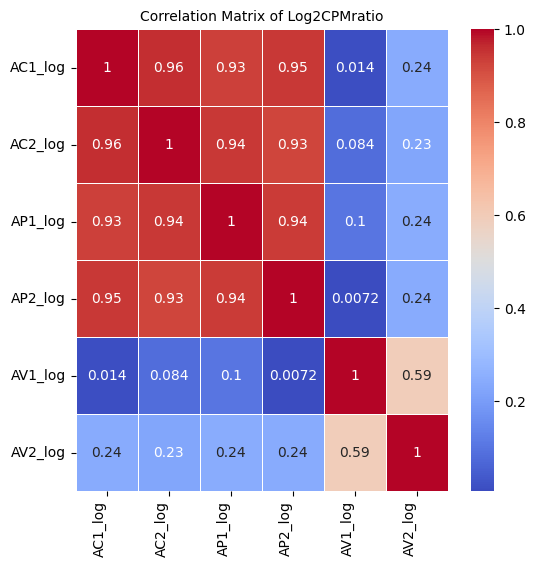

In [46]:
# Summary Statistics
print("Summary Statistics:")
print(fi2nlog.describe())

# Data Types and Non-Null Counts
# print("\nData Types and Non-Null Counts:")
# print(fi2nlog.info())

# Correlation Matrix
print("\nCorrelation Matrix:")
print(fi2nlog.corr())

# Display the correlation matrix as a heatmap
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
sns.heatmap(fi2nlog.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Log2CPMratio', fontsize = 10)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')  # Rotate and align
# Rotate y-axis labels
plt.yticks(rotation=0, ha='right')  # Rotation 0, keep horizontal

plt.show()

In [47]:
print("matrix of log2 enrichment values : fi2nlog") 

matrix of log2 enrichment values : fi2nlog


In [48]:
# check the Gaussian Distribution

In [49]:
from scipy import stats

def check_normality(dataframe):
    normality_results = {}

    for col in dataframe.columns:
        stat, p_value = stats.shapiro(dataframe[col].dropna())  # Drop NaNs before testing
        normality_results[col] = {"W-statistic": stat, "p-value": p_value}

    # Convert results to a DataFrame
    normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

    return normality_df

# Usage with fi2nlog
normality_results = check_normality(fi2nlog)

# Print results
print(normality_results)

         W-statistic        p-value
AC1_log     0.551608  4.109593e-119
AC2_log     0.566768  3.637332e-118
AP1_log     0.574314  1.104380e-117
AP2_log     0.535975  4.638769e-120
AV1_log     0.927023   2.268525e-74
AV2_log     0.918510   8.746529e-77


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24721.
  res = hypotest_fun_out(*samples, **kwds)


In [50]:
# Conclusion : the data is not gaussian distributed
# Nevertheless, to test Welch's T-test 

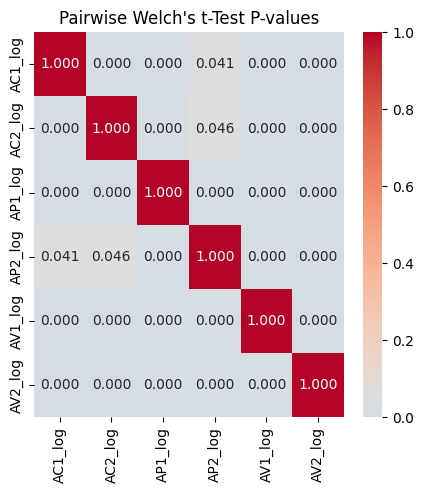

              AC1_log       AC2_log        AP1_log       AP2_log  \
AC1_log  1.000000e+00  2.186332e-05   3.259410e-28  4.064466e-02   
AC2_log  2.186332e-05  1.000000e+00   2.034144e-12  4.574099e-02   
AP1_log  3.259410e-28  2.034144e-12   1.000000e+00  7.347801e-18   
AP2_log  4.064466e-02  4.574099e-02   7.347801e-18  1.000000e+00   
AV1_log  7.314340e-21  2.749882e-05   4.111669e-06  3.305922e-10   
AV2_log  2.476650e-38  8.429667e-78  5.311401e-149  1.769161e-48   

               AV1_log        AV2_log  
AC1_log   7.314340e-21   2.476650e-38  
AC2_log   2.749882e-05   8.429667e-78  
AP1_log   4.111669e-06  5.311401e-149  
AP2_log   3.305922e-10   1.769161e-48  
AV1_log   1.000000e+00  2.186683e-279  
AV2_log  2.186683e-279   1.000000e+00  


In [51]:
# Perform pairwise Welch's t-tests (does not assume equal variance)
def compute_welch_t_tests(dataframe):
    columns = dataframe.columns
    welch_t_test_results = pd.DataFrame(np.ones((len(columns), len(columns))), 
                                        columns=columns, index=columns)

    # Compute pairwise Welch's t-tests while handling NaN values
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i < j:  # Avoid redundant computations and self-comparisons
                valid_col1 = dataframe[col1].dropna()  # Remove NaNs
                valid_col2 = dataframe[col2].dropna()  # Remove NaNs
                
                # Ensure there is enough data for the t-test
                #if len(valid_col1) > 1 and len(valid_col2) > 1:
                #    t_stat, p_value = stats.ttest_ind(valid_col1, valid_col2, 
                #                                      equal_var=True, nan_policy='omit')
                # else:
                #    p_value = np.nan  # Not enough data to compute t-test

                t_stat, p_value = stats.ttest_ind(valid_col1, valid_col2, 
                                                    equal_var=True, nan_policy='omit')
                                                   
                # Store p-values symmetrically
                welch_t_test_results.loc[col1, col2] = p_value
                welch_t_test_results.loc[col2, col1] = p_value  

    return welch_t_test_results

# Example usage with your matrix (replace 'fi2nlog' with actual variable)
welch_results = compute_welch_t_tests(fi2nlog)

# Plot heatmap of p-values
plt.figure(figsize=(5, 5))
sns.heatmap(welch_results, annot=True, cmap='coolwarm', center=0.05, fmt=".3f")
plt.title("Pairwise Welch's t-Test P-values")
plt.show()

# Print or save the results
print(welch_results)
# Save results if needed
welch_results.to_csv("welch_t_test_results.csv")

              AC1_log        AC2_log        AP1_log        AP2_log  \
AC1_log  1.000000e+00   2.403242e-38   5.053213e-82   4.995109e-03   
AC2_log  2.403242e-38   1.000000e+00   1.103883e-11   5.465701e-55   
AP1_log  5.053213e-82   1.103883e-11   1.000000e+00  1.527633e-103   
AP2_log  4.995109e-03   5.465701e-55  1.527633e-103   1.000000e+00   
AV1_log  0.000000e+00  2.476527e-220  1.026135e-126   0.000000e+00   
AV2_log  4.365831e-98   1.255041e-13   6.533614e-01  1.483184e-123   

               AV1_log        AV2_log  
AC1_log   0.000000e+00   4.365831e-98  
AC2_log  2.476527e-220   1.255041e-13  
AP1_log  1.026135e-126   6.533614e-01  
AP2_log   0.000000e+00  1.483184e-123  
AV1_log   1.000000e+00  1.518209e-190  
AV2_log  1.518209e-190   1.000000e+00  


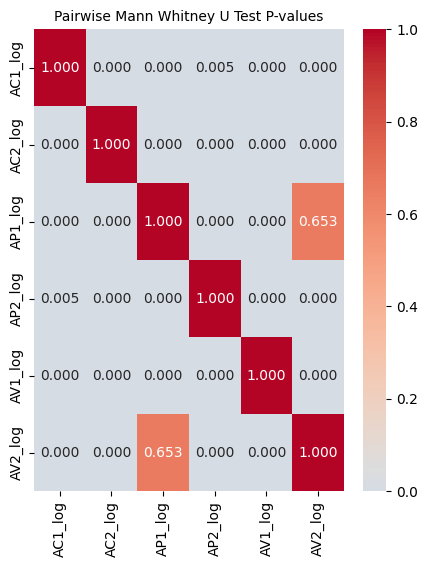

              AC1_log        AC2_log        AP1_log        AP2_log  \
AC1_log  1.000000e+00   2.403242e-38   5.053213e-82   4.995109e-03   
AC2_log  2.403242e-38   1.000000e+00   1.103883e-11   5.465701e-55   
AP1_log  5.053213e-82   1.103883e-11   1.000000e+00  1.527633e-103   
AP2_log  4.995109e-03   5.465701e-55  1.527633e-103   1.000000e+00   
AV1_log  0.000000e+00  2.476527e-220  1.026135e-126   0.000000e+00   
AV2_log  4.365831e-98   1.255041e-13   6.533614e-01  1.483184e-123   

               AV1_log        AV2_log  
AC1_log   0.000000e+00   4.365831e-98  
AC2_log  2.476527e-220   1.255041e-13  
AP1_log  1.026135e-126   6.533614e-01  
AP2_log   0.000000e+00  1.483184e-123  
AV1_log   1.000000e+00  1.518209e-190  
AV2_log  1.518209e-190   1.000000e+00  


In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Function to compute pairwise Mann-Whitney U tests
def compute_mann_whitney_tests(dataframe):
    columns = dataframe.columns
    mann_whitney_results = pd.DataFrame(np.ones((len(columns), len(columns))), 
                                        columns=columns, index=columns)

    # Compute pairwise Mann-Whitney U tests while handling NaN values
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            if i < j:  # Avoid redundant computations and self-comparisons
                valid_col1 = dataframe[col1].dropna()  # Remove NaNs
                valid_col2 = dataframe[col2].dropna()  # Remove NaNs

                _, p_value = stats.mannwhitneyu(valid_col1, valid_col2, alternative='two-sided')
                # Store results symmetrically
                mann_whitney_results.loc[col1, col2] = p_value
                mann_whitney_results.loc[col2, col1] = p_value  

    return mann_whitney_results

# usage
mann_whitney_results = compute_mann_whitney_tests(fi2nlog)

# Print results
print(mann_whitney_results)

# Save results if needed
# mann_whitney_results.to_csv("mann_whitney_results.csv")

# Plot heatmap of p-values
plt.figure(figsize=(5, 6))
sns.heatmap(mann_whitney_results, annot=True, cmap='coolwarm', center=0.05, fmt=".3f")
plt.title("Pairwise Mann Whitney U Test P-values", fontsize=10)
plt.show()

# Print or save the results
print(mann_whitney_results)
# Save results if needed
# welch_results.to_csv("welch_t_test_results.csv")

In [53]:
print("Violin plots")

Violin plots


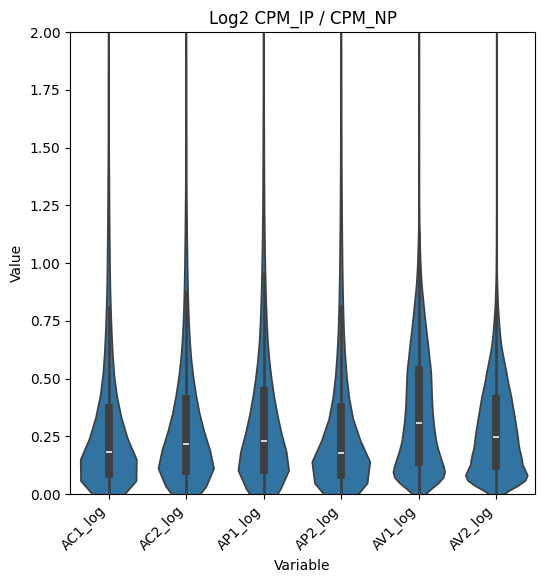

In [54]:
# Melt the DataFrame to long format for easier plotting
fi2nlog_melted = fi2nlog.melt(var_name='Variable', value_name='Value')

# Create the violin plot
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
sns.violinplot(x='Variable', y='Value', data=fi2nlog_melted)
plt.title('Log2 CPM_IP / CPM_NP')
plt.xticks(rotation=45, ha='right')

# Set y-axis limits (adjust as needed)
# plt.ylim(fi2nlog_melted["Value"].min() * 0.9, fi2nlog_melted["Value"].max() * 1.1)
plt.ylim(0,2)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15540\1677237226.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Variable', y='Value', data=fi2nlog_melted, inner='quartile', palette="Pastel1")


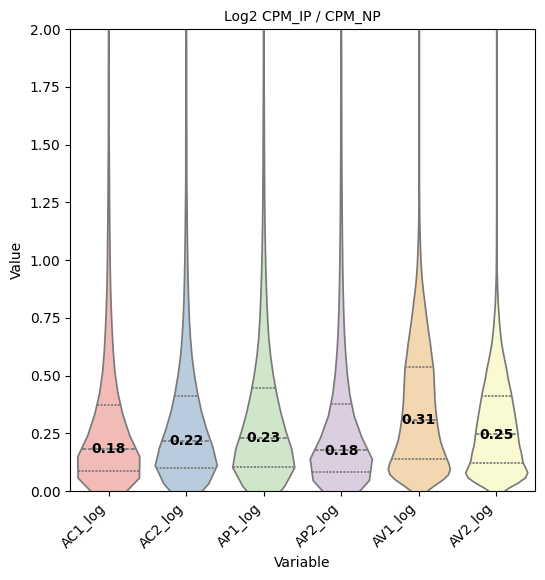

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(6, 6))

# Create the violin plot
ax = sns.violinplot(x='Variable', y='Value', data=fi2nlog_melted, inner='quartile', palette="Pastel1")
plt.title('Log2 CPM_IP / CPM_NP', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2)

# Calculate medians for each variable
medians = fi2nlog_melted.groupby("Variable")["Value"].median()

# Get the order of categories from the plot (assuming it follows the unique order)
order = fi2nlog_melted["Variable"].unique()

# Annotate each median on the plot
for i, variable in enumerate(order):
    median_val = medians[variable]
    plt.text(i, median_val, f'{median_val:.2f}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=10, 
             color='black', 
             weight='semibold')

plt.show()


In [56]:
# Print summary statistics
print(fi2nlog.describe())

# The default output of fi2nlog.describe() includes the median as the "50%" row. 

            AC1_log       AC2_log       AP1_log       AP2_log       AV1_log  \
count  24721.000000  24721.000000  24721.000000  24721.000000  24721.000000   
mean       0.329062      0.347447      0.379200      0.338402      0.361987   
std        0.485507      0.477378      0.525266      0.528040      0.263269   
min        0.000153      0.000137      0.000163      0.000132      0.000139   
25%        0.085664      0.101251      0.104822      0.082573      0.140217   
50%        0.183815      0.215380      0.230803      0.175819      0.308636   
75%        0.374567      0.410791      0.445470      0.375331      0.537849   
max        8.862574      7.545950      7.634765      8.884671      2.204325   

            AV2_log  
count  24721.000000  
mean       0.285612  
std        0.205612  
min        0.000344  
25%        0.119513  
50%        0.245349  
75%        0.409727  
max        2.134637  


In [57]:
print("Filtering the low values of enrichment, log2 (CPM_IP / CPM_NP) < Threshold")

Filtering the low values of enrichment, log2 (CPM_IP / CPM_NP) < Threshold


In [58]:
# This code removes values below a chosen threshold (default: |log₂FC| < Threshold).

import numpy as np
import pandas as pd

# Define threshold
threshold = 0.3  # Threshold

# Apply threshold: Keep only values above |threshold|
filtered_fi2nlog = fi2nlog.copy()
filtered_fi2nlog[np.abs(filtered_fi2nlog) < threshold] = np.nan  # Replace low values with NaN

# Display filtered matrix
print(filtered_fi2nlog)

# Compute the total number of NaN values in the entire DataFrame
total_nans = filtered_fi2nlog.isna().sum().sum()

# Print the result
print(f"For a threshold {threshold} : total NaN values in the entire DataFrame: {total_nans}")

# if threshold is 1, 141698 are NaN, from a total of 148362
# threshold is 0.5 : Total NaN values in the entire DataFrame: 119040
# threshold 0.3 : Total NaN values in the entire DataFrame: 90874
# threshold 0.2 : Total NaN values in the entire DataFrame: 68633

        AC1_log   AC2_log   AP1_log   AP2_log   AV1_log   AV2_log
2           NaN       NaN       NaN       NaN  0.529772  0.374345
25     0.470914  0.413429  0.758050  0.566117  0.463810  0.674404
31          NaN       NaN  0.592552       NaN  0.953797  0.413535
34          NaN  0.518836  0.462589       NaN  0.726004       NaN
37          NaN       NaN       NaN       NaN  0.315509       NaN
...         ...       ...       ...       ...       ...       ...
77981  1.006078  0.847160  0.782502  1.152520       NaN       NaN
77986       NaN       NaN       NaN       NaN  0.363319  0.461546
77994       NaN       NaN  0.423515       NaN  0.894880  0.544930
77996       NaN       NaN  0.307060       NaN       NaN       NaN
77997       NaN       NaN       NaN       NaN       NaN       NaN

[24721 rows x 6 columns]
For a threshold 0.3 : total NaN values in the entire DataFrame: 90832


In [59]:
2**0.3

1.2311444133449163

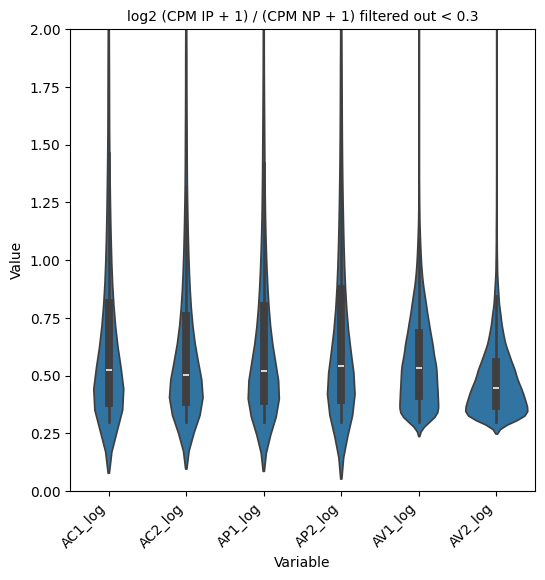

In [60]:
# Melt the DataFrame to long format for easier plotting
filtered_fi2nlog_melted = filtered_fi2nlog.melt(var_name='Variable', value_name='Value')

# Create the violin plot
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
sns.violinplot(x='Variable', y='Value', data=filtered_fi2nlog_melted)
plt.title('log2 (CPM IP + 1) / (CPM NP + 1) filtered out < 0.3', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Set y-axis limits (adjust as needed)
# plt.ylim(fi2nlog_melted["Value"].min() * 0.9, fi2nlog_melted["Value"].max() * 1.1)
plt.ylim(0,2)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15540\1203319956.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Variable', y='Value', data=filtered_fi2nlog_melted, inner='quartile', palette="Pastel1")


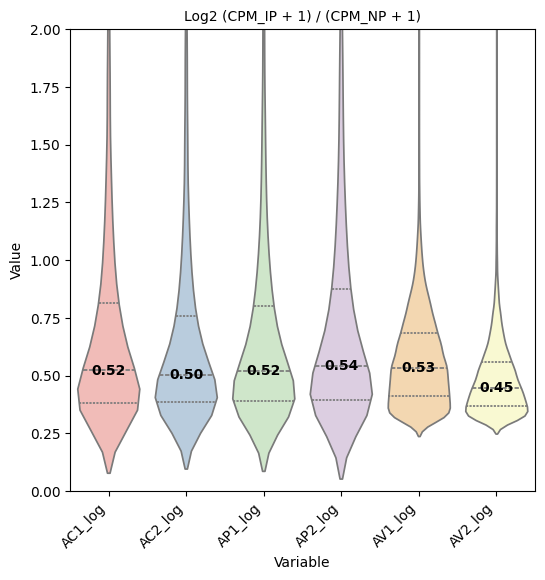

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(6, 6))

# Create the violin plot
ax = sns.violinplot(x='Variable', y='Value', data=filtered_fi2nlog_melted, inner='quartile', palette="Pastel1")
plt.title('Log2 (CPM_IP + 1) / (CPM_NP + 1)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2)

# Calculate medians for each variable
medians = filtered_fi2nlog_melted.groupby("Variable")["Value"].median()

# Get the order of categories from the plot (assuming it follows the unique order)
order = filtered_fi2nlog_melted["Variable"].unique()

# Annotate each median on the plot
for i, variable in enumerate(order):
    median_val = medians[variable]
    plt.text(i, median_val, f'{median_val:.2f}', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=10, 
             color='black', 
             weight='semibold')

plt.show()

In [62]:
print(fi2nlog.head(3))
print(filtered_fi2nlog.head(3))

     AC1_log   AC2_log   AP1_log   AP2_log   AV1_log   AV2_log
2   0.211153  0.151167  0.217969  0.225121  0.529772  0.374345
25  0.470914  0.413429  0.758050  0.566117  0.463810  0.674404
31  0.271079  0.198588  0.592552  0.152935  0.953797  0.413535
     AC1_log   AC2_log   AP1_log   AP2_log   AV1_log   AV2_log
2        NaN       NaN       NaN       NaN  0.529772  0.374345
25  0.470914  0.413429  0.758050  0.566117  0.463810  0.674404
31       NaN       NaN  0.592552       NaN  0.953797  0.413535


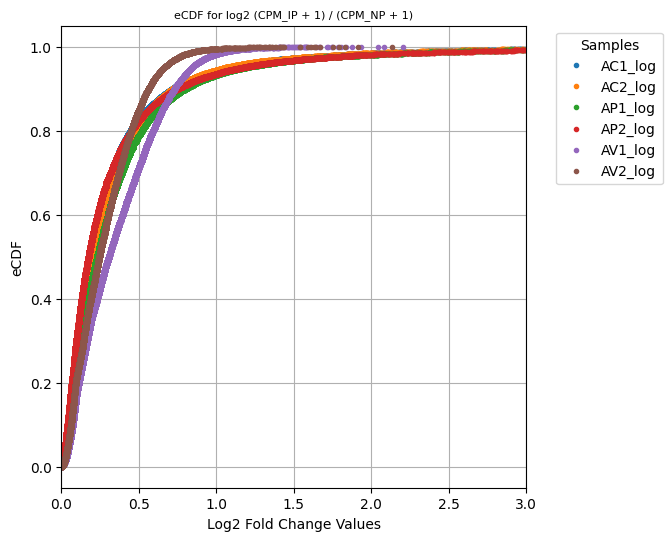

In [63]:
# Create an Empirical Cumulative Distribution Function (ECDF) plot for fin2log
plt.figure(figsize=(6, 6))

# Plot ECDF for each column in the matrix
for col in fi2nlog.columns:
    sorted_values = np.sort(fi2nlog[col].dropna())  # Remove NaNs and sort values
    ecdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)  # Compute ECDF
    plt.plot(sorted_values, ecdf, marker='.', linestyle='none', label=col)

# Set plot labels and title
plt.xlabel("Log2 Fold Change Values")
plt.ylabel("eCDF")
plt.title("eCDF for log2 (CPM_IP + 1) / (CPM_NP + 1)", fontsize=8)
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,3)
    
# Show the plot
plt.grid(True)
plt.show()

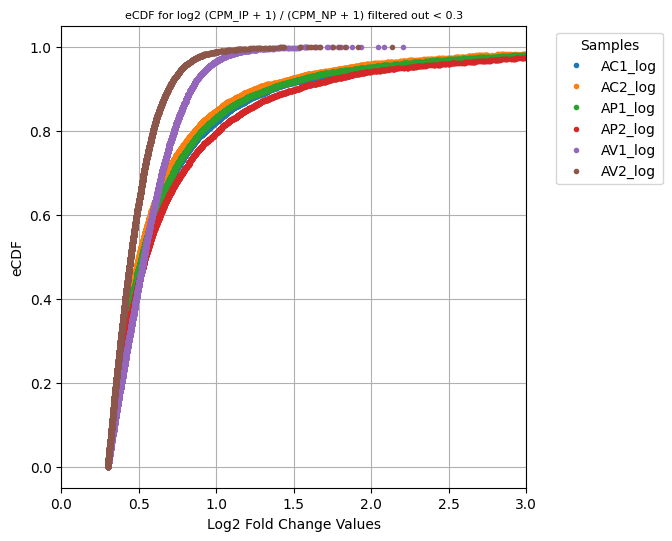

In [64]:
# Create an Empirical Cumulative Distribution Function (ECDF) plot for fin2log : FILTERED
plt.figure(figsize=(6, 6))

# Plot ECDF for each column in the matrix
for col in filtered_fi2nlog.columns:
    sorted_values = np.sort(filtered_fi2nlog[col].dropna())  # Remove NaNs and sort values
    ecdf = np.arange(1, len(sorted_values) + 1) / len(sorted_values)  # Compute ECDF
    plt.plot(sorted_values, ecdf, marker='.', linestyle='none', label=col)

# Set plot labels and title
plt.xlabel("Log2 Fold Change Values")
plt.ylabel("eCDF")
plt.title("eCDF for log2 (CPM_IP + 1) / (CPM_NP + 1) filtered out < 0.3", fontsize=8)
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlim(0,3)
    
# Show the plot
plt.grid(True)
plt.show()

In [65]:
print("Density Plots")

Density Plots


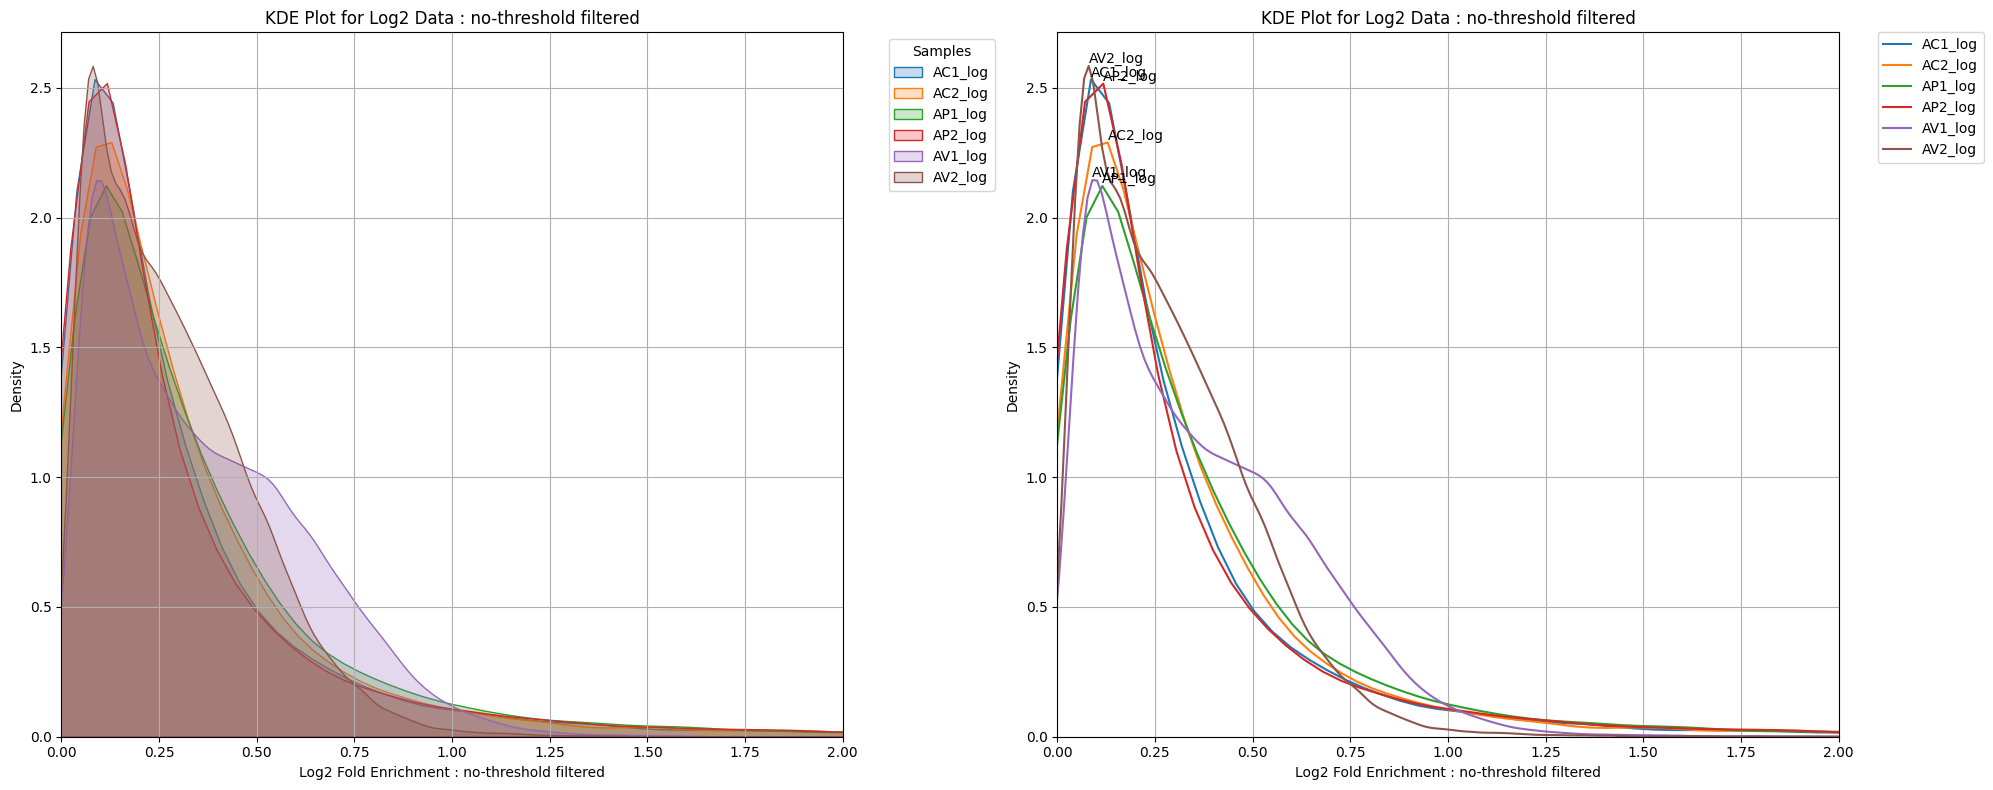

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

##############################################
# Left Plot: Filled KDE Plot
##############################################
for col in fi2nlog.columns:
    sns.kdeplot(fi2nlog[col].dropna(), label=col, fill=True, ax=ax1)

ax1.set_xlabel("Log2 Fold Enrichment : no-threshold filtered")
ax1.set_ylabel("Density")
ax1.set_title("KDE Plot for Log2 Data : no-threshold filtered", fontsize=12)
ax1.set_xlim(0, 2)
ax1.grid(True)
ax1.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')

##############################################
# Right Plot: Line KDE Plot with Sample Labels
##############################################
for col in fi2nlog.columns:
    # Plot the KDE with no fill and with a label for the legend
    kdeplot_line = sns.kdeplot(fi2nlog[col].dropna(), label=col, fill=False, ax=ax2)
    
    # Retrieve x and y values from the plotted line
    x_values = kdeplot_line.lines[-1].get_xdata()
    y_values = kdeplot_line.lines[-1].get_ydata()
    
    # Annotate the plot with the sample label at the peak density point
    if len(x_values) > 0 and len(y_values) > 0:
        max_idx = np.argmax(y_values)
        ax2.text(x_values[max_idx], y_values[max_idx], col, fontsize=10, verticalalignment='bottom')

ax2.set_xlabel("Log2 Fold Enrichment : no-threshold filtered")
ax2.set_ylabel("Density")
ax2.set_title("KDE Plot for Log2 Data : no-threshold filtered", fontsize=12)
ax2.set_xlim(0, 2)
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


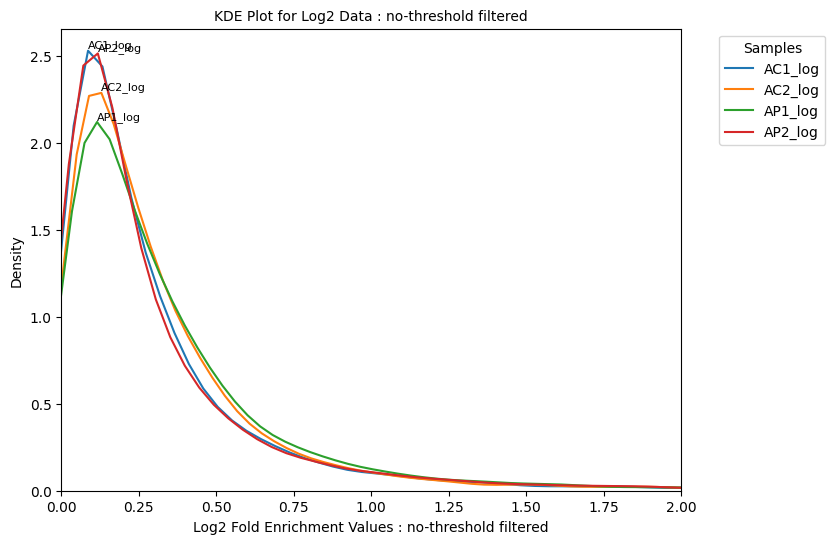

In [67]:
# excluding the vehicle samples

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the vehicle samples
fi2nlog_excluded = fi2nlog.drop(columns=['AV1_log', 'AV2_log'])

# Create a density plot (KDE) without shaded areas, only lines
plt.figure(figsize=(8, 6))

# Plot density (KDE) for each column in the matrix without fill
for col in fi2nlog_excluded.columns:
    kdeplot = sns.kdeplot(fi2nlog_excluded[col].dropna(), label=col, fill=False)
    
    # Get the KDE data to place labels at peak density
    x_values = kdeplot.lines[-1].get_xdata()
    y_values = kdeplot.lines[-1].get_ydata()
    
    if len(x_values) > 0 and len(y_values) > 0:
        max_idx = np.argmax(y_values)  # Find the peak density index
        plt.text(x_values[max_idx], y_values[max_idx], col, fontsize=8, verticalalignment='bottom')

# Set plot labels and title
plt.xlabel("Log2 Fold Enrichment Values : no-threshold filtered")
plt.ylabel("Density")
plt.title("KDE Plot for Log2 Data : no-threshold filtered", fontsize=10)

# Set x-axis limits
plt.xlim(0, 2)
plt.grid(False)

# Add a legend with the sample labels placed on the right-hand side
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


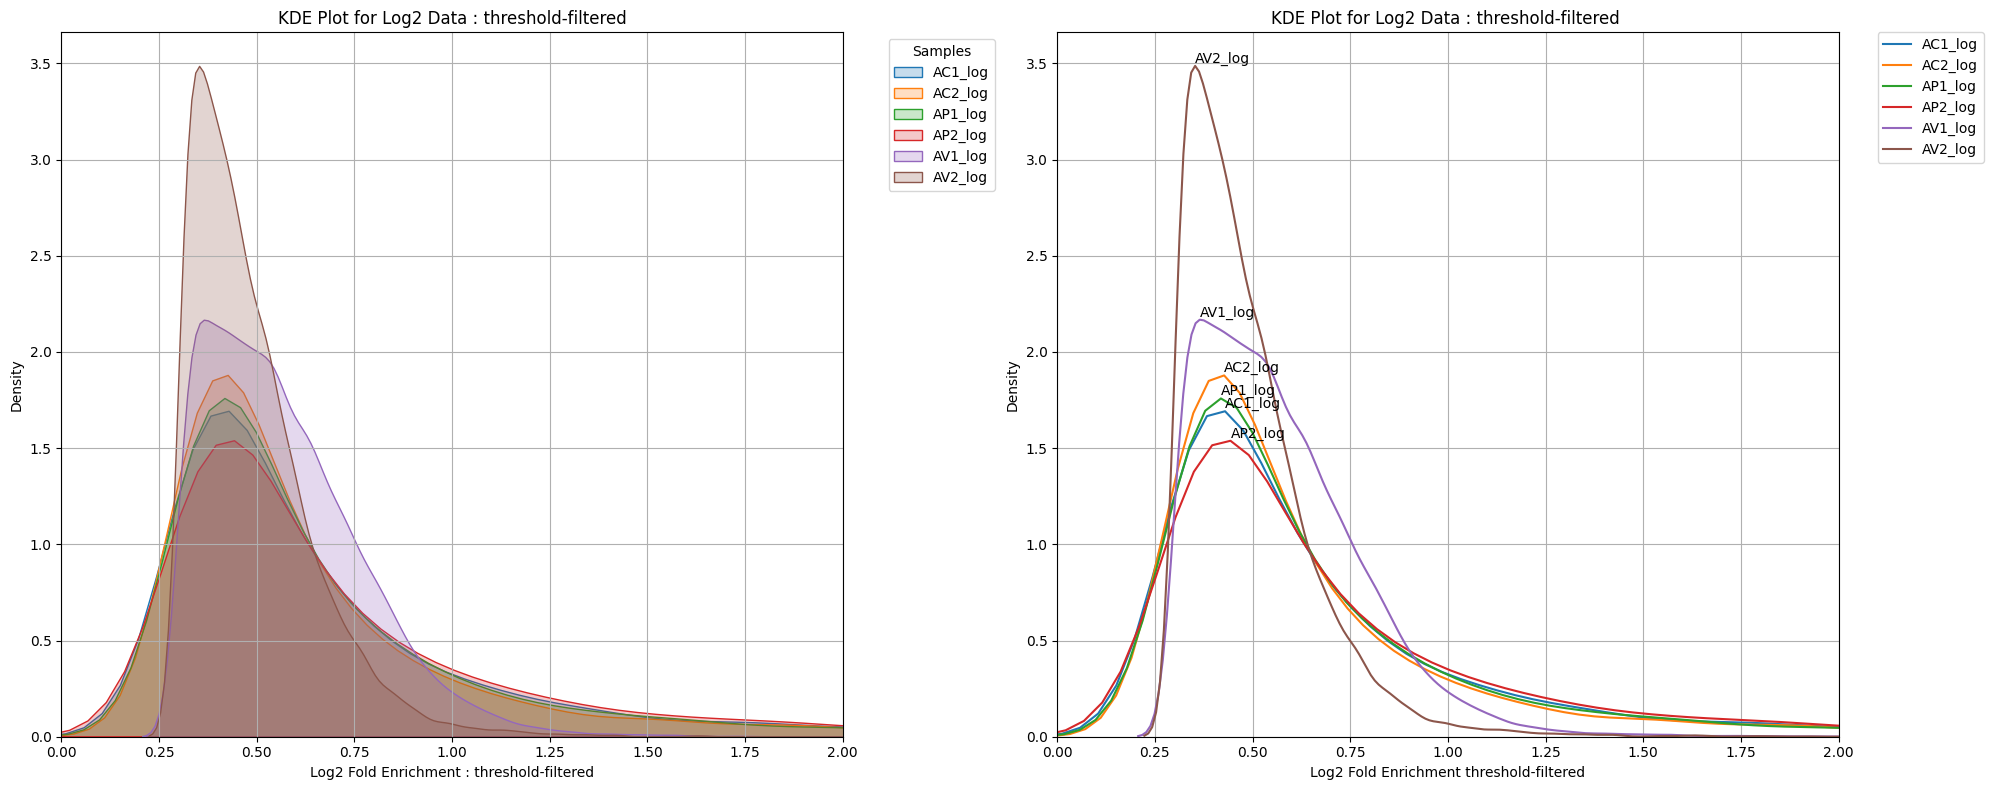

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

##############################################
# Left Plot: Filled KDE Plot
##############################################
for col in filtered_fi2nlog.columns:
    sns.kdeplot(filtered_fi2nlog[col].dropna(), label=col, fill=True, ax=ax1)

ax1.set_xlabel("Log2 Fold Enrichment : threshold-filtered")
ax1.set_ylabel("Density")
ax1.set_title("KDE Plot for Log2 Data : threshold-filtered", fontsize=12)
ax1.set_xlim(0, 2)
ax1.grid(True)
ax1.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')

##############################################
# Right Plot: Line KDE Plot with Sample Labels
##############################################
for col in filtered_fi2nlog.columns:
    # Plot the KDE with no fill and with a label for the legend
    kdeplot_line = sns.kdeplot(filtered_fi2nlog[col].dropna(), label=col, fill=False, ax=ax2)
    
    # Retrieve x and y values from the plotted line
    x_values = kdeplot_line.lines[-1].get_xdata()
    y_values = kdeplot_line.lines[-1].get_ydata()
    
    # Annotate the plot with the sample label at the peak density point
    if len(x_values) > 0 and len(y_values) > 0:
        max_idx = np.argmax(y_values)
        ax2.text(x_values[max_idx], y_values[max_idx], col, fontsize=10, verticalalignment='bottom')

ax2.set_xlabel("Log2 Fold Enrichment threshold-filtered")
ax2.set_ylabel("Density")
ax2.set_title("KDE Plot for Log2 Data : threshold-filtered ", fontsize=12)
ax2.set_xlim(0, 2)
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


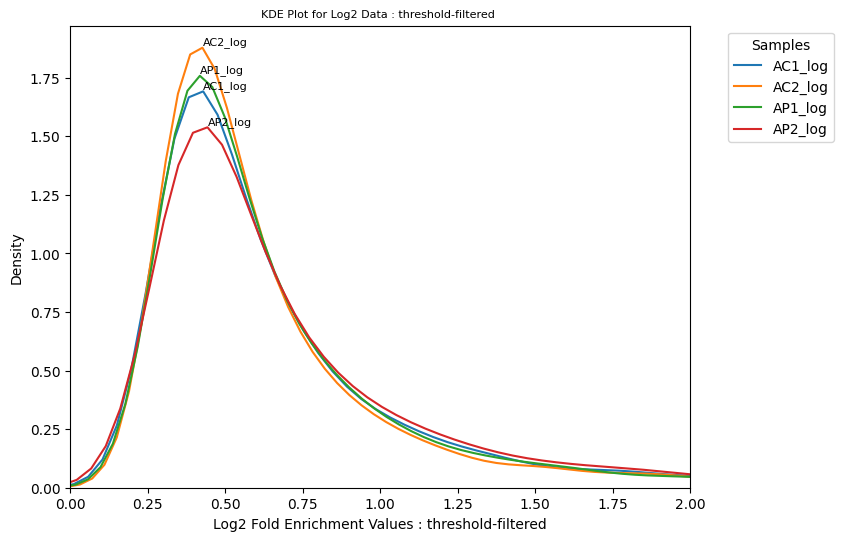

In [69]:
# excluding the vehicle samples

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the vehicle samples
filtered_fi2nlog_excluded = filtered_fi2nlog.drop(columns=['AV1_log', 'AV2_log'])

# Create a density plot (KDE) without shaded areas, only lines
plt.figure(figsize=(8, 6))

# Plot density (KDE) for each column in the matrix without fill
for col in filtered_fi2nlog_excluded.columns:
    kdeplot = sns.kdeplot(filtered_fi2nlog_excluded[col].dropna(), label=col, fill=False)
    
    # Get the KDE data to place labels at peak density
    x_values = kdeplot.lines[-1].get_xdata()
    y_values = kdeplot.lines[-1].get_ydata()
    
    if len(x_values) > 0 and len(y_values) > 0:
        max_idx = np.argmax(y_values)  # Find the peak density index
        plt.text(x_values[max_idx], y_values[max_idx], col, fontsize=8, verticalalignment='bottom')

# Set plot labels and title
plt.xlabel("Log2 Fold Enrichment Values : threshold-filtered")
plt.ylabel("Density")
plt.title("KDE Plot for Log2 Data : threshold-filtered ", fontsize=8)

# Set x-axis limits
plt.xlim(0, 2)
plt.grid(False)

# Add a legend with the sample labels placed on the right-hand side
plt.legend(title="Samples", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [70]:
# fi2nlog.columns

In [71]:
# filtered_fi2nlog.columns

In [72]:
print(fi2nlog.columns.tolist())

['AC1_log', 'AC2_log', 'AP1_log', 'AP2_log', 'AV1_log', 'AV2_log']


In [73]:
print(fi2nlog.head(3))

     AC1_log   AC2_log   AP1_log   AP2_log   AV1_log   AV2_log
2   0.211153  0.151167  0.217969  0.225121  0.529772  0.374345
25  0.470914  0.413429  0.758050  0.566117  0.463810  0.674404
31  0.271079  0.198588  0.592552  0.152935  0.953797  0.413535


In [74]:
print(fi2nlog.tail(3))

        AC1_log   AC2_log   AP1_log   AP2_log   AV1_log   AV2_log
77994  0.293636  0.255138  0.423515  0.127292  0.894880  0.544930
77996  0.241520  0.240359  0.307060  0.214565  0.247800  0.192019
77997  0.144719  0.238400  0.169744  0.149066  0.179742  0.239880


In [75]:
# Plotting the correlation plots between the replicates

In [76]:
print("Plotting the correlation plots between the replicates")

Plotting the correlation plots between the replicates


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

def plot_correlation(df, col1, col2):
    """Generate a correlation scatter plot with regression line, R² value, and RMSE."""
    
    plt.figure(figsize=(6, 6), dpi=100)  # Set a reasonable DPI

    # Drop NaN values from the selected columns
    df_clean = df[[col1, col2]].dropna()
    
    # Scatter plot with regression line
    ax = sns.regplot(x=df_clean[col1], y=df_clean[col2],
                     scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    
    # Compute R² and RMSE
    r2 = r2_score(df_clean[col1], df_clean[col2])
    rmse = np.sqrt(mean_squared_error(df_clean[col1], df_clean[col2]))
    
    # Labels and formatting
    plt.xlabel(col1, fontsize=10)
    plt.ylabel(col2, fontsize=10)
    plt.title(f"Correlation Plot: {col1} vs {col2}", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
 
    # Set axis limits
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    
    # Display R² and RMSE on the plot using relative axes coordinates
    plt.text(0.05, 0.95, f'R²: {r2:.4f}\nRMSE: {rmse:.2f}', 
             transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()


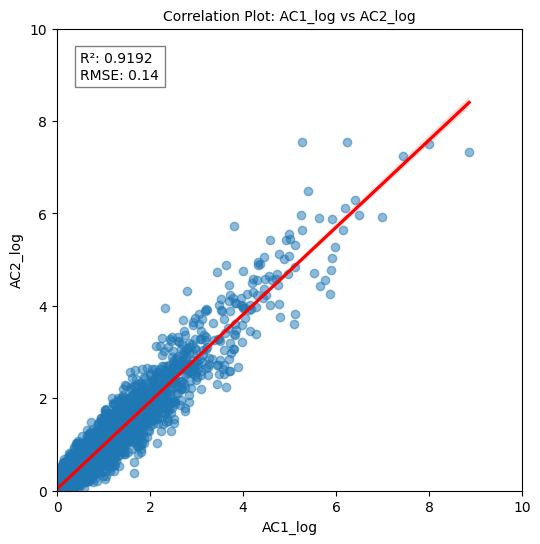

In [78]:
plot_correlation(fi2nlog, 'AC1_log', 'AC2_log')

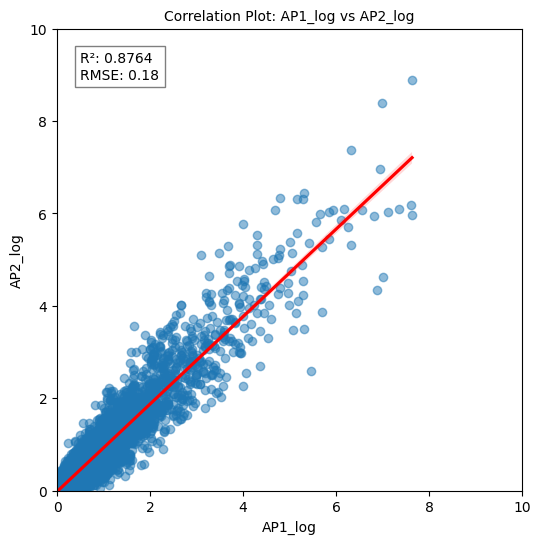

In [79]:
plot_correlation(fi2nlog, 'AP1_log', 'AP2_log')

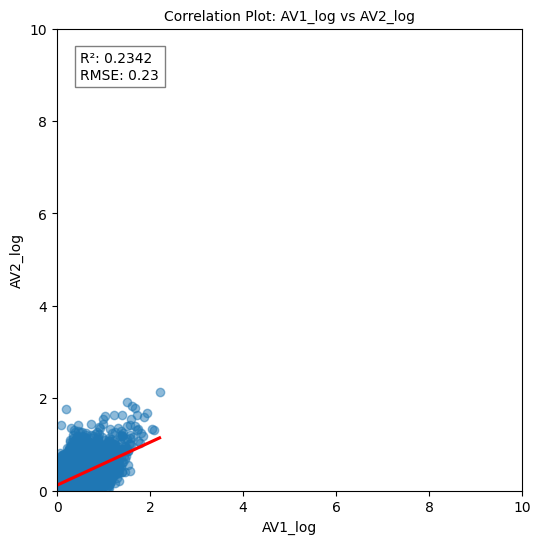

In [80]:
plot_correlation(fi2nlog, 'AV1_log', 'AV2_log')

reploting the correlation plot for the vehicle samples


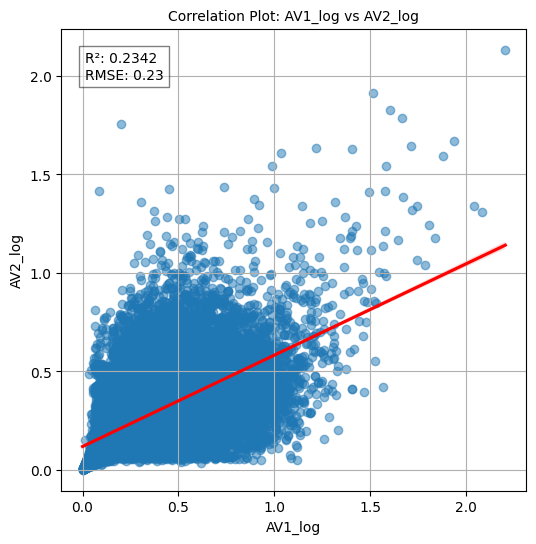

In [81]:
print("reploting the correlation plot for the vehicle samples")

# Extract the columns and drop NaNs
df_clean = fi2nlog[['AV1_log', 'AV2_log']].dropna()

plt.figure(figsize=(6, 6), dpi=100)

# Create the scatter plot with a regression line
ax = sns.regplot(x=df_clean['AV1_log'], y=df_clean['AV2_log'], 
                 scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Compute R² and RMSE
r2 = r2_score(df_clean['AV1_log'], df_clean['AV2_log'])
rmse = np.sqrt(mean_squared_error(df_clean['AV1_log'], df_clean['AV2_log']))

# Set plot labels and title
plt.xlabel('AV1_log', fontsize=10)
plt.ylabel('AV2_log', fontsize=10)
plt.title("Correlation Plot: AV1_log vs AV2_log", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optionally, adjust axis limits if needed
# plt.xlim(min_value, max_value)
# plt.ylim(min_value, max_value)

# Annotate the plot with R² and RMSE using relative axes coordinates
plt.text(0.05, 0.95, f'R²: {r2:.4f}\nRMSE: {rmse:.2f}', 
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.grid(True)
plt.show()

In [82]:
# PCA analysis on the matrix fi2nlog

In [83]:
import pandas as pd
from sklearn.decomposition import PCA
# Standardize the data (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler

print("PCA analysis on the matrix fi2nlog")

PCA analysis on the matrix fi2nlog


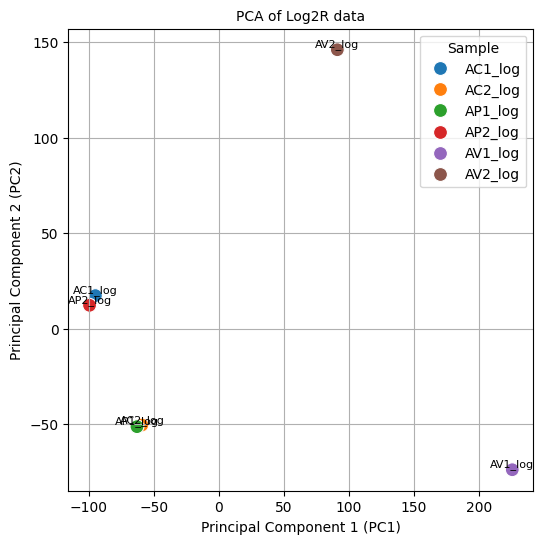

Explained Variance Ratio: [0.5767733  0.21818267]


In [84]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (example: remove rows with NaNs)
rna_data = fi2nlog.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rna_data.T)

# 2. Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# 3. Visualize Results
# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add sample names to the PCA DataFrame
pca_df['Sample'] = rna_data.columns

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Sample', data=pca_df, s=100)

# Add sample labels as annotations
for i, sample_name in enumerate(pca_df['Sample']):
    plt.annotate(sample_name, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8, ha='center', va='bottom')

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Log2R data', fontsize=10)
plt.grid(True)
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [85]:
print("reassigning the matrix to fi3")

reassigning the matrix to fi3


In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fi3 = fi2nlog

# Standardizing the data (genes as rows, samples as columns)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(rna_data)  # Keep genes as rows

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


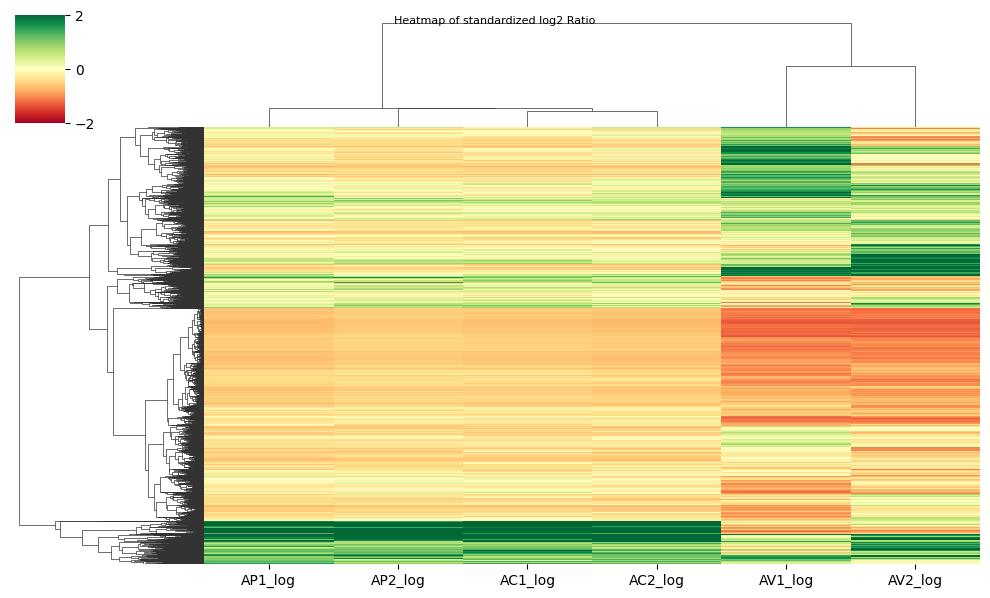

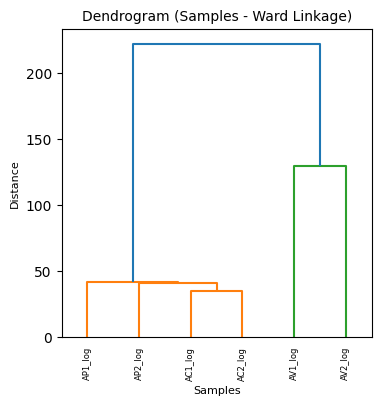

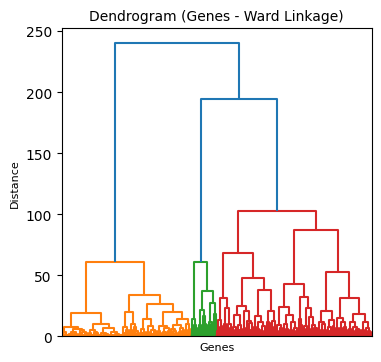

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import matplotlib.pyplot as plt

rna_data = fi3.dropna()

# Standardize the data (Z-score normalization)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(rna_data)

# Clip values between -2 and 2
clipped_data = np.clip(standardized_data, -2, 2)

# Convert to DataFrame
clipped_df = pd.DataFrame(clipped_data, index=rna_data.index, columns=rna_data.columns)

### **1. Create Heatmap with Sample Dendrogram**
# Perform hierarchical clustering on samples (columns)
dist_matrix = pdist(clipped_df.T, metric='euclidean')  # Pairwise distances between columns
col_linkage = linkage(dist_matrix, method='ward')  # Use Ward's method for clustering

# Create a clustered heatmap, hiding row labels (which typically appear on the right-hand side)
g = sns.clustermap(clipped_df, cmap='RdYlGn', col_linkage=col_linkage, 
                   figsize=(10, 6), vmin=-2, vmax=2, yticklabels=False)

# Set the title using the ClusterGrid's figure
g.fig.suptitle('Heatmap of standardized log2 Ratio', fontsize=8)
plt.show()

### **2. Create Separate Dendrogram for Samples**
plt.figure(figsize=(4, 4))
dendrogram(col_linkage, labels=list(rna_data.columns), leaf_rotation=90, leaf_font_size=6)

plt.title('Dendrogram (Samples - Ward Linkage)', fontsize=10)  # Updated title
plt.xlabel('Samples', fontsize=8)
plt.ylabel('Distance', fontsize=8)
plt.xticks(fontsize=6)
plt.show()

# Perform hierarchical clustering on genes (rows)
dist_matrix_rows = pdist(clipped_df, metric='euclidean')  # Pairwise distances between rows
row_linkage = linkage(dist_matrix_rows, method='ward')  # Ward's method for rows

### **3. Create Separate Dendrogram for Genes**
plt.figure(figsize=(4, 4))
dendrogram(row_linkage, no_labels=True, leaf_rotation=90, leaf_font_size=6)

plt.title('Dendrogram (Genes - Ward Linkage)', fontsize=10)
plt.xlabel('Genes', fontsize=8)
plt.ylabel('Distance', fontsize=8)
plt.xticks(fontsize=6)
plt.show()


In [88]:
print("MDS")

MDS


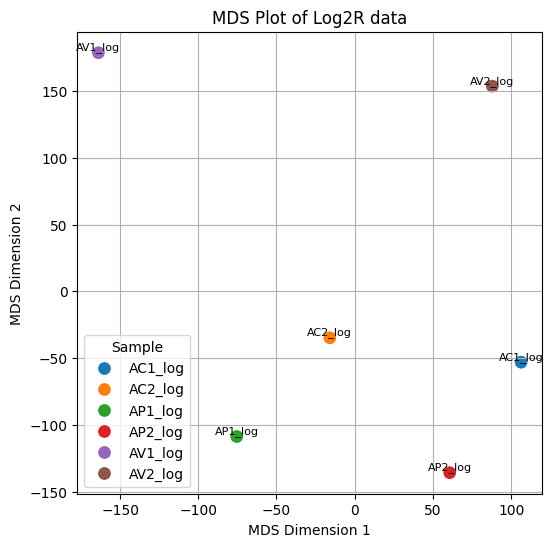

In [89]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (example: remove rows with NaNs)
rna_data = fi3.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rna_data.T)

# 1. Perform MDS
mds = MDS(n_components=2, random_state=42)  # Set random_state for reproducibility
mds_coordinates = mds.fit_transform(scaled_data)

# 2. Visualize Results
# Create DataFrame for MDS results
mds_df = pd.DataFrame(data=mds_coordinates, columns=['MDS1', 'MDS2'])

# Add sample names to the MDS DataFrame
mds_df['Sample'] = rna_data.columns

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='MDS1', y='MDS2', hue='Sample', data=mds_df, s=100)

# Add sample labels as annotations
for i, sample_name in enumerate(mds_df['Sample']):
    plt.annotate(sample_name, (mds_df['MDS1'][i], mds_df['MDS2'][i]), fontsize=8, ha='center', va='bottom')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Plot of Log2R data')
plt.grid(True)
plt.show()

In [90]:
print("UMAP")

UMAP


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


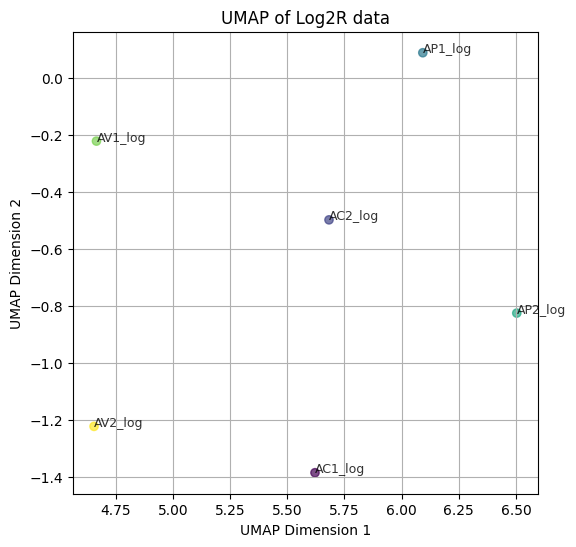

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import umap 

# Step 1: Remove rows with missing data (NaNs)
rna_data = fi3.dropna()

# Step 2: Scale the data (transpose so samples are rows)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(rna_data.T)

# Convert scaled_array back to DataFrame (for easy labeling)
scaled_df = pd.DataFrame(scaled_array, index=rna_data.columns)

# Run UMAP
import umap
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_components = umap_model.fit_transform(scaled_df)

# Generate an array of colors for each sample using a colormap (e.g., viridis)

num_samples = len(scaled_df.index)
colors = plt.cm.viridis(np.linspace(0, 1, num_samples))

# Plot UMAP with sample names as labels and different colors for each sample
plt.figure(figsize=(6, 6))
plt.scatter(umap_components[:, 0], umap_components[:, 1], c=colors, alpha=0.7)

# Annotate each sample with its name
for i, sample_name in enumerate(scaled_df.index):
    plt.text(umap_components[i, 0], umap_components[i, 1], sample_name, fontsize=9, alpha=0.8)

plt.title('UMAP of Log2R data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)
plt.show()


In [92]:
print("NMF")

NMF


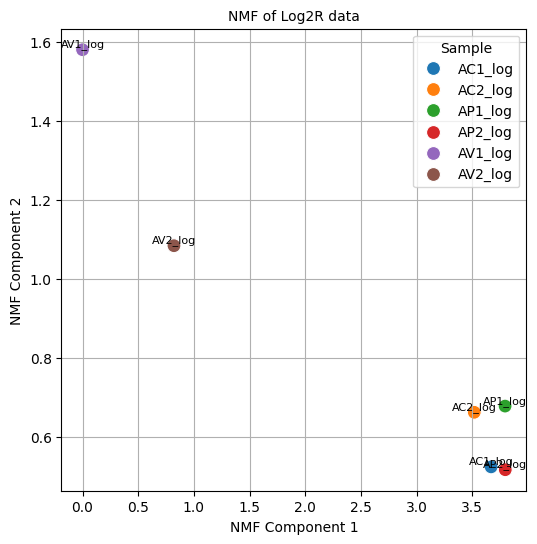

In [93]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (example: remove rows with NaNs)
rna_data = fi3.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rna_data.T)

# 2. Perform NMF
# Note: NMF requires all input data to be non-negative, so ensure your data meets this requirement.
# If your scaled data has negative values, apply a transformation to make it non-negative.
non_negative_data = scaled_data - np.min(scaled_data)  # Shift values to be non-negative
nmf = NMF(n_components=2, random_state=42)
nmf_components = nmf.fit_transform(non_negative_data)

# 3. Visualize Results
# Create DataFrame for NMF results
nmf_df = pd.DataFrame(data=nmf_components, columns=['Component1', 'Component2'])

# Add sample names to the NMF DataFrame
nmf_df['Sample'] = rna_data.columns

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Component1', y='Component2', hue='Sample', data=nmf_df, s=100)

# Add sample labels as annotations
for i, sample_name in enumerate(nmf_df['Sample']):
    plt.annotate(sample_name, (nmf_df['Component1'][i], nmf_df['Component2'][i]), fontsize=8, ha='center', va='bottom')

plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.title('NMF of Log2R data', fontsize=10)
plt.grid(True)
plt.show()


In [94]:
print("ICA")

ICA


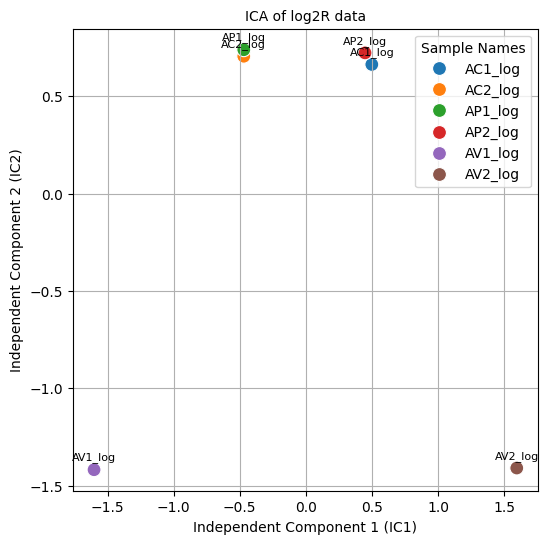

In [95]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (example: remove rows with NaNs)
rna_data = fi3.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rna_data.T)

# 2. Perform ICA
n_components = 2  # Choose the number of components
ica = FastICA(n_components=n_components, random_state=42)
ica_components = ica.fit_transform(scaled_data)

# 3. Visualize Results
# Create DataFrame for ICA results
ica_df = pd.DataFrame(data=ica_components, columns=[f'IC{i+1}' for i in range(n_components)])

# Add sample names to the ICA DataFrame
ica_df['Sample'] = rna_data.columns

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=f'IC1', y=f'IC2', hue='Sample', data=ica_df, s=100)
plt.legend(title='Sample Names')

# Add sample labels as annotations
for i, sample_name in enumerate(ica_df['Sample']):
    plt.annotate(sample_name, (ica_df[f'IC1'][i], ica_df[f'IC2'][i]), fontsize=8, ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Independent Component 1 (IC1)')
plt.ylabel('Independent Component 2 (IC2)')
plt.title('ICA of log2R data', fontsize=10)
plt.grid(True)
plt.show()

# If you want to see the components (genes' contributions):
# components_df = pd.DataFrame(ica.components_, columns=rna_data.index)
# print(components_df)

In [96]:
# use GMM = gaussian mixture models
# Unable to allocate 13.7 GiB for an array with shape (3, 24721, 24721) and data type float64

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import umap

# First, handle missing values (if needed) and scale the data

# rna_data = fi3.dropna()  # Remove rows with NaNs
# Transpose so that samples are rows and features are columns
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(rna_data.T)

# Apply Gaussian Mixture Models
# Choose the number of clusters (components), for example, 3
# n_components = 3
# gmm = GaussianMixture(n_components=n_components, random_state=42)
# gmm.fit(scaled_data)

# Predict cluster labels for each sample
# cluster_labels = gmm.predict(scaled_data)

# For visualization, reduce the dimensionality with UMAP to 2 components
# umap_model = umap.UMAP(n_components=2, random_state=42)
# umap_components = umap_model.fit_transform(scaled_data)

# Create a DataFrame with UMAP components and predicted clusters
# umap_df = pd.DataFrame(umap_components, columns=['UMAP1', 'UMAP2'], index=rna_data.columns)
# umap_df['Cluster'] = cluster_labels.astype(str)  # Convert clusters to string for plotting

# Plot UMAP with clusters indicated by different colors
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', data=umap_df, s=100, alpha=0.8)
# plt.title("UMAP of Samples with GMM Clusters", fontsize=14)
# plt.xlabel("UMAP Dimension 1", fontsize=12)
# plt.ylabel("UMAP Dimension 2", fontsize=12)
# plt.legend(title="Cluster", fontsize=10, title_fontsize=12)
# plt.grid(True)
# plt.show()


In [98]:
# use RBM = restricted Boltzman Machines

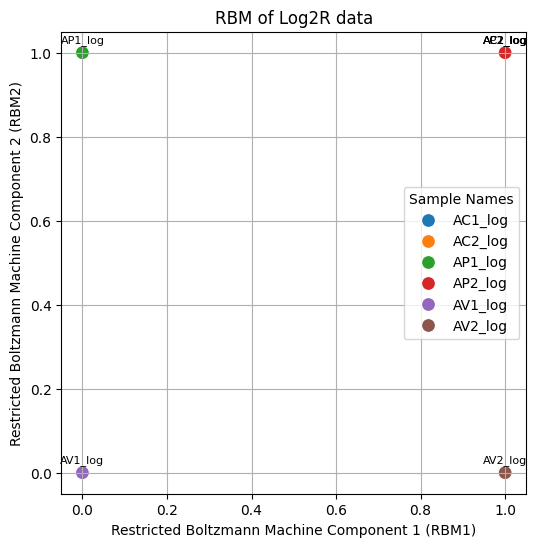

In [99]:
import pandas as pd
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (example: remove rows with NaNs)
rna_data = fi3.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rna_data.T)

# 2. Perform RBM
n_components = 2  # Choose the number of components
rbm = BernoulliRBM(n_components=n_components, random_state=42, verbose=0)

# Create a pipeline to combine scaling and RBM
pipeline = Pipeline(steps=[('scaler', scaler), ('rbm', rbm)])

# Fit the pipeline to the data
pipeline.fit(scaled_data)

# Transform the data to get the hidden layer representation
rbm_components = pipeline.transform(scaled_data)

# 3. Visualize Results
# Create DataFrame for RBM results
rbm_df = pd.DataFrame(data=rbm_components, columns=[f'RBM{i+1}' for i in range(n_components)])

# Add sample names to the RBM DataFrame
rbm_df['Sample'] = rna_data.columns

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=f'RBM1', y=f'RBM2', hue='Sample', data=rbm_df, s=100)
plt.legend(title='Sample Names')

# Add sample labels as annotations
for i, sample_name in enumerate(rbm_df['Sample']):
    plt.annotate(sample_name, (rbm_df[f'RBM1'][i], rbm_df[f'RBM2'][i]), fontsize=8, ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Restricted Boltzmann Machine Component 1 (RBM1)')
plt.ylabel('Restricted Boltzmann Machine Component 2 (RBM2)')
plt.title('RBM of Log2R data')
plt.grid(True)
plt.show()